# Data Analysis Project (Beginner)
This project is made to demonstate my ability to perform data analysis, derive conclusions and plot pictorial representations of complex datasets
objectives for a project on analyzing and visualizing international IQ data:

##### Explore and Understand the Data:
Load the dataset and inspect its structure.
Check for missing values, duplicates, and handle them appropriately.
Get a sense of the basic statistics and information about the data.

##### Calculate Average IQ
Calculate the average IQ score for each country.
Identify countries with the highest and lowest average IQ scores.

##### Visualize IQ Scores:
Create visualizations to represent the distribution of IQ scores across different countries.
Use a bar chart to display the average IQ scores for each country.

##### Identify Trends and Patterns:
Explore any noticeable trends or patterns in the IQ data.
Consider creating additional visualizations to highlight interesting findings.

##### Summarize your findings and insights.
Provide context to the data and draw conclusions based on your analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv("International_IQ.csv")    #Making a dataframe

#### 1. Exploring and understanding data

In [3]:
#Inspecting the dataset
df.head()

,Ranking,Country,Average IQ,Participants
0,1,Japan,108.14,155534
1,2,South Korea,107.00,104316
2,3,China,106.59,190255
3,4,Iran (Islamic Republic of),106.52,1657
4,5,Singapore,104.75,5975


In [4]:
df.tail()

,Ranking,Country,Average IQ,Participants
120,121,El Salvador,86.96,1415
121,122,Congo,86.91,356
122,123,Honduras,86.87,2010
123,124,Nicaragua,86.30,1585
124,125,Mali,86.05,222


In [5]:
#Exploring and uderstadning the dataset
#We can see that we already have a index by means of 'Ranking'
#Thus we won't be needing the index generated by the pandas library

df = df.set_index("Ranking")
df.head()

,Country,Average IQ,Participants
Ranking,,,
1,Japan,108.14,155534
2,South Korea,107.00,104316
3,China,106.59,190255
4,Iran (Islamic Republic of),106.52,1657
5,Singapore,104.75,5975


In [6]:
#We first check if any row have null values
#If so, we drop all rows that have null values to get rid of inconsistencies in the dataframe
df.isnull()
df.dropna(how='all', axis=0)

,Country,Average IQ,Participants
Ranking,,,
1,Japan,108.14,155534
2,South Korea,107.00,104316
3,China,106.59,190255
4,Iran (Islamic Republic of),106.52,1657
5,Singapore,104.75,5975
...,...,...,...
121,El Salvador,86.96,1415
122,Congo,86.91,356
123,Honduras,86.87,2010


In [7]:
df.isnull()

,Country,Average IQ,Participants
Ranking,,,
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
...,...,...,...
121,False,False,False
122,False,False,False
123,False,False,False


In [8]:
#Dropping any duplicates
df.drop_duplicates()
df.head(7)

,Country,Average IQ,Participants
Ranking,,,
1,Japan,108.14,155534
2,South Korea,107.00,104316
3,China,106.59,190255
4,Iran (Islamic Republic of),106.52,1657
5,Singapore,104.75,5975
6,Mongolia,102.50,1393
7,Australia,101.96,6574


### 2.Calculate average IQ and generate statistics for the dataframe

In [9]:
print("The Average IQ of all countries is : ", df["Average IQ"].mean())
print("The average IQ of the top 20 countries with the highest Average IQ is : ", df["Average IQ"].head(20).mean())

The Average IQ of all countries is :  95.83991999999999
The average IQ of the top 20 countries with the highest Average IQ is :  102.08250000000001


In [10]:
#To find the country with the most Average IQ
df = df.sort_index(ascending=True)
print("The country with the most Average IQ is : ", df.iloc[0,0])


The country with the most Average IQ is :  Japan


In [24]:
#Countries that have higher than average IQ 
smart = df.loc[df['Average IQ']>df["Average IQ"].mean()]
smart

,Country,Average IQ,Participants
Ranking,,,
1,Japan,108.14,155534
2,South Korea,107.00,104316
3,China,106.59,190255
4,Iran (Islamic Republic of),106.52,1657
5,Singapore,104.75,5975
...,...,...,...
66,Cuba,96.43,1431
67,Iraq,96.27,383
68,Ireland,96.25,1621


In [25]:
#The general statistic of the dataframe are : 
df.describe()

,Average IQ,Participants
count,125.000000,125.000000
mean,95.839920,12527.864000
std,4.670021,29347.233519
min,86.050000,209.000000
25%,92.980000,960.000000
50%,96.830000,2430.000000
75%,99.050000,10830.000000
max,108.140000,190255.000000


### Plotting countries by Average IQ on the graph


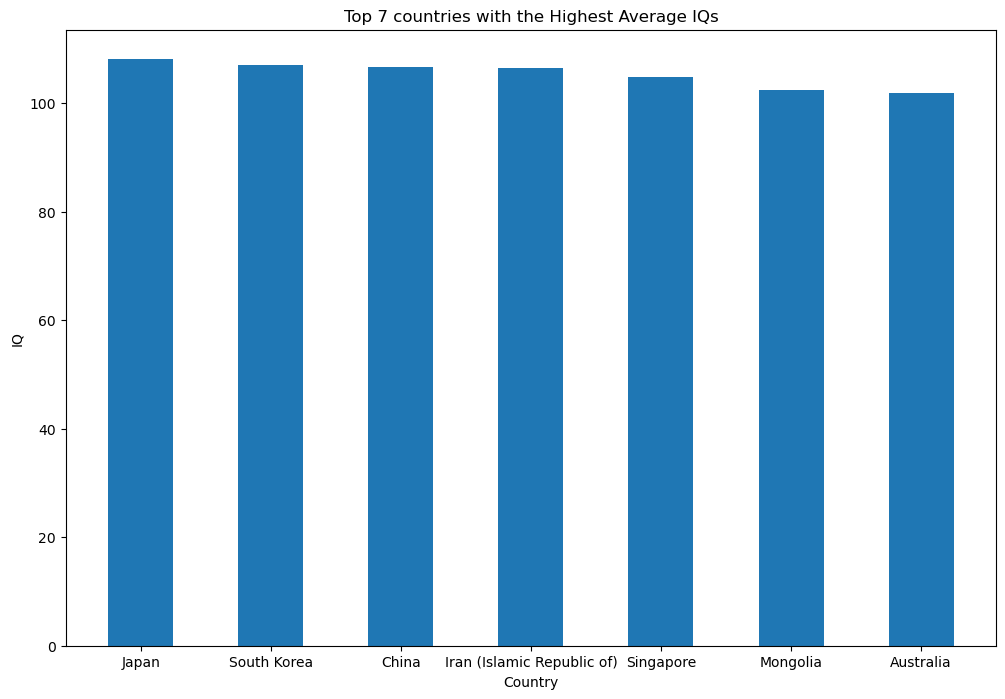

In [18]:
#For this, we plot the X values as countries and Y values as their Average IQ scores

country  = df['Country'].head(7).astype(str).tolist()

plt.figure(figsize=(12,8))
iqofppl = df['Average IQ'].head(7).to_numpy()
plt.bar(country, iqofppl, width = 0.5, align = 'center')
plt.xlabel(xlabel = 'Country')
plt.ylabel(ylabel = 'IQ')
plt.title("Top 7 countries with the Highest Average IQs")
plt.show()

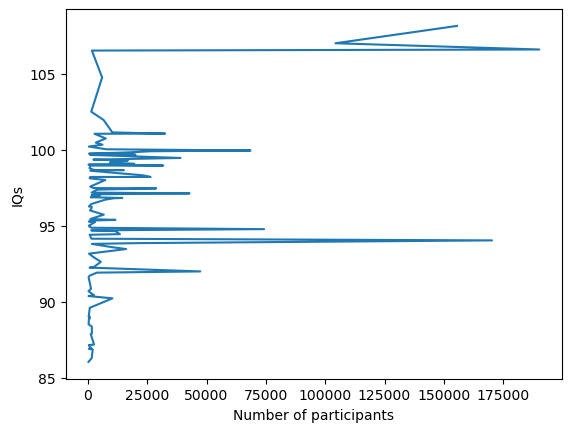

In [22]:
#Discover relationship between no of participants and iq
iq = df['Average IQ'].to_numpy()
part = df['Participants'].to_numpy()

plt.plot(part, iq)
plt.xlabel(xlabel = 'Number of participants')
plt.ylabel(ylabel='IQs')
plt.show()